# Crack Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from crackest import cracks
from crackalysis import CrackAn
from crackest.crack_analyzer import CrackAnalyzer

from rosta_demonstrace import get_countours, get_crack_mask, build_graph

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cp = cracks.CrackPy(model=0)
import os 

file1='/Volumes/WDC_1TB_1/Datasets/GACR_Barca/01082022_C_13dnu/Images/1_Image_01-08-2022 02-36-53.png'
file2='/Volumes/WDC_1TB_1/Datasets/GACR_Barca/01082022_C_13dnu/Images/1_Image_01-08-2022 02-36-53.png'
cp.get_mask(impath="../Examples/Img/ID14_940_Image.png")

cp.set_ratio(160,40)


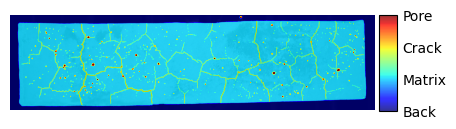

In [3]:
cp.preview()

In [4]:
cp.get_metrics()


{'edge_per_node': np.float64(1.404332129963899),
 'crack_tot_length': np.float64(21458.804283406607),
 'average_angle': np.float64(90.55129087862866),
 'spec_area': (np.float64(117414.96632295058),),
 'mat_area': (np.float64(23568.09292264591),),
 'crack_ratio': (np.float64(0.03178677307834885),),
 'crack_length': (np.float64(417.62699080222035),),
 'crack_thickness': (np.float64(0.17411909916069992),),
 'pore_area': (np.float64(877.6304082428746),),
 'avg_pore_distance': np.float64(1929.4754536324854),
 'avg_pore_size': np.float64(114.96969696969697)}

In [14]:
import numpy as np
mask=cp.masks["spec"]
w,h=mask.shape

hor_line=mask[int(w/2-10):int(w/2+10),:].mean(axis=0)
hind=np.where(hor_line>0)[0]
length_px=np.diff([hind[0],hind[-1]])

ver_line=mask[:,int(h/2-10):int(h/2+10)].mean(axis=1)
vind=np.where(ver_line>0)[0]
width_px=np.diff([vind[0],vind[-1]])

In [2]:
ca=CrackAn()
#folder="/Volumes/WDC_1TB_1/Datasets/GACR_Barca/01082022_C_13dnu/Images"

ca.input(file="../Examples/Img/ID14_940_Image.png")
#ca.input(folder=folder)

ca.registr()

,bbox,sbbox,angle,area,x0,y0,subspec,eq,sett,ratio,cover
0,"[23, 123, 1338, 5213]","[69, 1314, 0, 5076]",0.880573,6030595.0,2637.345705,714.198233,"{'img': [[[1 1 2], [1 1 2], [1 1 2], [1 1 2], ...","{'h': {'alpha': 65.06136587085395, 'beta': -17...","{'ID': 1, 'angle': -0.8805727874259759, 'label...",0,1.0


In [5]:
img_list=ca.specimens

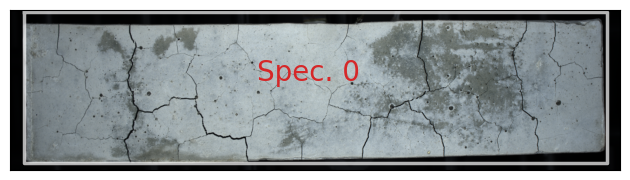

In [3]:
ca.preview()

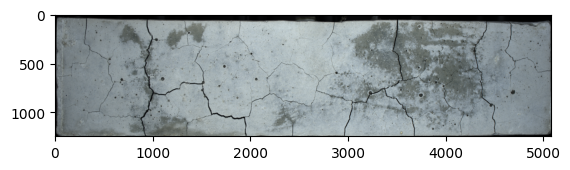

In [5]:
spec=ca.get_spec(specid=0,imgindex=0,anotate=False)

import matplotlib.pyplot as plt
plt.imshow(spec.img)

In [6]:
metr=spec.get_metrics()
print(metr)

{'edge_per_node': np.float64(1.3), 'crack_tot_length': np.float64(20346.76580576398), 'average_angle': np.float64(88.17192036693345), 'spec_area': (np.uint64(5973500),), 'mat_area': (np.uint64(133133),), 'crack_ratio': (np.float64(0.02937507324014397),), 'crack_length': (np.int64(19825),), 'crack_thickness': (np.float64(8.851046658259772),), 'pore_area': (np.uint64(37515),), 'avg_pore_distance': np.float64(1981.0302224953844), 'avg_pore_size': np.float64(128.2655172413793)}


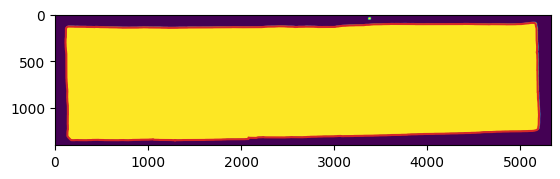

In [31]:
import numpy as np
import cv2
from skimage import measure
import matplotlib.pyplot as plt

r = cp.mask[:, :] == 0
r = (~r).astype(np.uint8)

total_area=r.shape[0]*r.shape[1]
area_trsh=int(total_area*0.3)

kernel = np.ones((20, 20), np.uint8)
r = cv2.erode(r, kernel)
r = cv2.dilate(r, kernel, iterations=1)

contours = measure.find_contours(r, 0.8)

area=0
for i in range(len(contours)):
    count=contours[i]
    c = np.expand_dims(count.astype(np.float32), 1)
    c = cv2.UMat(c)
    area = cv2.contourArea(c)
    if area>area_trsh:
        break

plt.imshow(r)
plt.plot(count[:,1],count[:,0],color="tab:red")

In [5]:
imgr, maskr = get_countours(cp, plot=False)
mask_r, img_r = get_crack_mask(imgr, maskr, plot=False)
# plot_specimen(img_r)
graph, eq = build_graph(mask_r)
# plot_cracks(True, eq)
# plot_cracks()

In [6]:
cran = CrackAnalyzer(graph)
# cran.graph_stats()
df_nodes, df_edges = cran.analyze_cracks()

In [7]:
print(f"Average number of edges per node: {df_nodes['num_edges'].mean():.3f}")
print(f"Total length of cracks: {df_edges['length'].sum():.3f}")
mean_angle_weighted = (df_edges["angle"] * df_edges["length"]).sum() / df_edges["length"].sum()
print(f"Average direction of cracks: {mean_angle_weighted:.3f}°")

Average number of edges per node: 1.350
Total length of cracks: 23549.719
Average direction of cracks: 90.089°


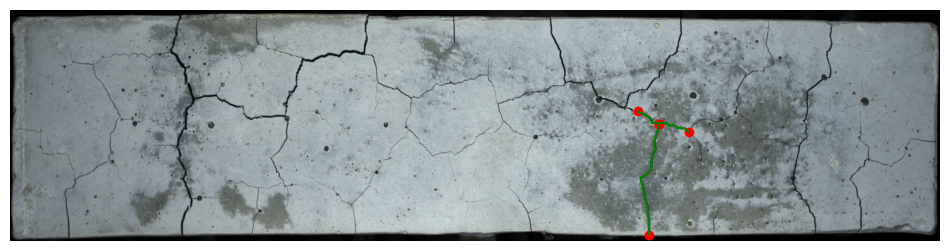

In [8]:
# cran.plot_cracks(img_r)
cran.plot_cracks(img_r, selected_edge_ids=["2_1374", "1243_1374", "1374_1512"])
# cran.plot_cracks(img_r, selected_edge_ids=["2557_2557"])  # -> circular crack???

In [9]:
img_r.shape

(1265, 5091, 3)

In [14]:
df_nodes.loc[2], df_nodes.loc[1374]
# df_nodes.loc[2557]  # -> circular crack???

(coordinates          [34, 3499]
 num_edges                     1
 neighboring_nodes        [1374]
 Name: 2, dtype: object,
 coordinates              [643, 3554]
 num_edges                          3
 neighboring_nodes    [2, 1243, 1512]
 Name: 1374, dtype: object)

In [15]:
# df_edges[df_edges["angle"] < 0.0]
df_edges.loc[["2_1374", "1243_1374", "1374_1512"]]
# df_edges.loc[["2557_2557"]]  # -> circular crack???

,num_pts,start_node,end_node,length,angle
edge_id,,,,,
2_1374,626,2,1374,688.374675,84.302602
1243_1374,165,1243,1374,190.509668,150.326923
1374_1512,130,1374,1512,151.367532,148.131745


In [12]:
df_edges.describe()

,num_pts,start_node,end_node,length,angle
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,88.649573,1360.978632,1489.239316,100.639826,90.565512
std,97.690702,748.844589,723.991774,110.965345,39.634580
min,21.000000,0.000000,57.000000,21.656854,6.110842
25%,28.000000,753.000000,879.250000,31.692388,70.766956
50%,48.500000,1425.500000,1506.000000,55.624131,89.999997
75%,117.000000,1945.250000,2075.000000,133.031746,114.822532
max,720.000000,2584.000000,2584.000000,821.310750,172.205041


In [13]:
df_nodes.describe()

,num_edges
count,371.000000
mean,1.350404
std,0.771883
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000
